<a href="https://colab.research.google.com/github/AdiDev1411/Machine-learning/blob/main/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.DataFrame()

In [4]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [5]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [6]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

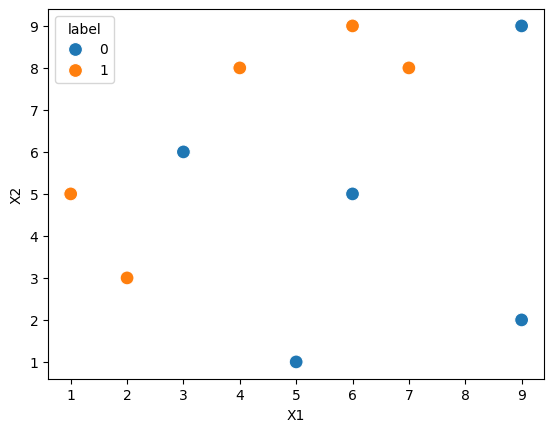

In [7]:
sns.scatterplot( x = df['X1'] , y = df['X2'] , hue=df['label'] , s=100)

In [8]:
# give every row equal weights
df['weights'] = 1/df.shape[0]

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt1 = DecisionTreeClassifier(max_depth=1) # maxdepth should be 1 cause in boosting it is stemp

In [14]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

In [16]:
#step 2 train 1st model
dt1.fit(X ,y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

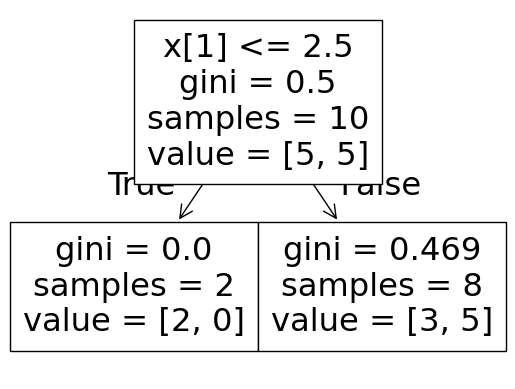

In [18]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

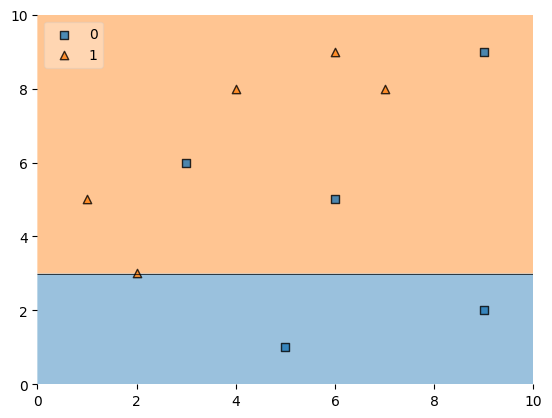

In [20]:
plot_decision_regions( X.values , y.values , clf=dt1 , legend=2)

In [21]:
df['y_pred'] = dt1.predict(X)

In [22]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [23]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/error)

In [24]:
alpha1 = calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)